Accuracy Rate : 0.978

Confusion Matrix :
 [[490   8]
 [ 14 488]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       498
           1       0.98      0.97      0.98       502

    accuracy                           0.98      1000
   macro avg       0.98      0.98      0.98      1000
weighted avg       0.98      0.98      0.98      1000



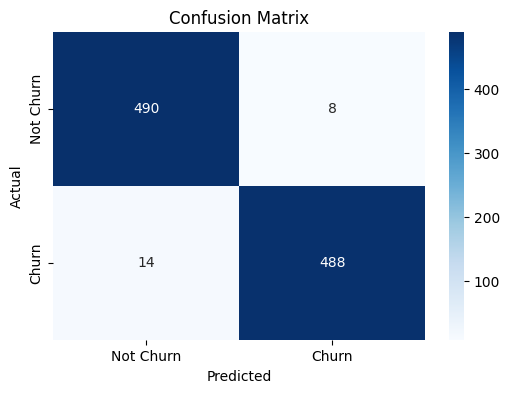

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay


data=pd.read_csv("Netflix_churn_Prediction.csv")   
data_update = data.drop(columns=["customer_id"])
X = data_update.drop("churned", axis=1)
y = data_update["churned"]
categorical_columns = X.select_dtypes(include=['object']).columns
numeric_columns= X.select_dtypes(include=['int64','float64']).columns
numeric_converter = Pipeline(steps=[
    ('Filling_Missing_value ', SimpleImputer(strategy='median')),
    ('Scaling_values', StandardScaler())
])
categorical_converter = Pipeline(steps=[
    ('Filling_Missing_value', SimpleImputer(strategy='most_frequent')),
    ('Onehot_Encoding', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor_step = ColumnTransformer(
    transformers=[
        ('numerical', numeric_converter, numeric_columns),
        ('categorical', categorical_converter, categorical_columns)
    ])
model = Pipeline(steps=[
    ('Preprocessing ', preprocessor_step),
    ('Classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy Rate :", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix :\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Churn","Churn"], yticklabels=["Not Churn","Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()



In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             5000 non-null   object 
 1   age                     5000 non-null   int64  
 2   gender                  5000 non-null   object 
 3   subscription_type       5000 non-null   object 
 4   watch_hours             5000 non-null   float64
 5   last_login_days         5000 non-null   int64  
 6   region                  5000 non-null   object 
 7   device                  5000 non-null   object 
 8   monthly_fee             5000 non-null   float64
 9   churned                 5000 non-null   int64  
 10  payment_method          5000 non-null   object 
 11  number_of_profiles      5000 non-null   int64  
 12  avg_watch_time_per_day  5000 non-null   float64
 13  favorite_genre          5000 non-null   object 
dtypes: float64(3), int64(4), object(7)
memor

In [9]:
data_update = data.drop(columns=["customer_id"])

In [8]:
 data_update.head(10) 

,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,churned,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre
0,51,Other,Basic,14.73,29,Africa,TV,8.99,1,Gift Card,1,0.49,Action
1,47,Other,Standard,0.70,19,Europe,Mobile,13.99,1,Gift Card,5,0.03,Sci-Fi
2,27,Female,Standard,16.32,10,Asia,TV,13.99,0,Crypto,2,1.48,Drama
3,53,Other,Premium,4.51,12,Oceania,TV,17.99,1,Crypto,2,0.35,Horror
4,56,Other,Standard,1.89,13,Africa,Mobile,13.99,1,Crypto,2,0.13,Action
5,58,Female,Standard,13.80,26,Oceania,Mobile,13.99,0,Debit Card,3,0.51,Action
6,48,Other,Basic,13.83,20,Asia,TV,8.99,0,Gift Card,5,0.66,Romance
7,51,Male,Basic,14.30,56,Europe,Mobile,8.99,1,Gift Card,1,0.25,Action
8,45,Other,Basic,9.98,10,Asia,Mobile,8.99,0,PayPal,3,0.91,Romance
9,32,Other,Premium,2.22,34,Europe,TV,17.99,1,Debit Card,1,0.06,Drama


In [12]:
import matplotlib.pyplot as plt
expected_cols = X.columns

def predict_customer_churn(new_customer: dict, model, expected_cols):
    new_data = pd.DataFrame([{col: new_customer.get(col, None) for col in expected_cols}])

    
    prediction = model.predict(new_data)[0]
    prediction_proba = model.predict_proba(new_data)[0] * 100  # convert to %

    if prediction == 1:
        print("🔴 Customer is likely to CHURN")
    else:
        print("🟢 Customer is NOT likely to CHURN ")

    print("Probabilities (%):", dict(zip(["Not Churn", "Churn"], prediction_proba.round(2))))

    labels = ["Not Churn", "Churn"]
    colors = ["green", "red"]
    explode = (0.05, 0.05)  
    
    plt.pie(
        prediction_proba,
        labels=labels,
        autopct="%1.1f%%",
        startangle=90,
        colors=colors,
        explode=explode,
        shadow=True
    )
    plt.title("Churn Prediction (%) for New Customer")
    plt.show()

🟢 Customer is NOT likely to CHURN 
Probabilities (%): {'Not Churn': np.float64(99.0), 'Churn': np.float64(1.0)}


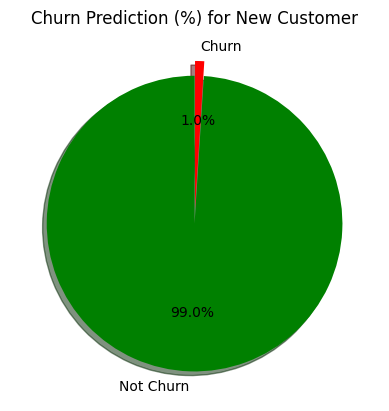

🔴 Customer is likely to CHURN
Probabilities (%): {'Not Churn': np.float64(6.0), 'Churn': np.float64(94.0)}


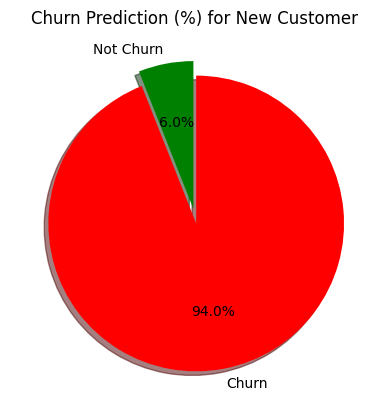

🟢 Customer is NOT likely to CHURN 
Probabilities (%): {'Not Churn': np.float64(99.0), 'Churn': np.float64(1.0)}


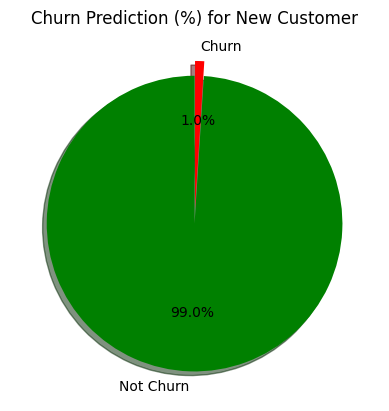

🟢 Customer is NOT likely to CHURN 
Probabilities (%): {'Not Churn': np.float64(84.0), 'Churn': np.float64(16.0)}


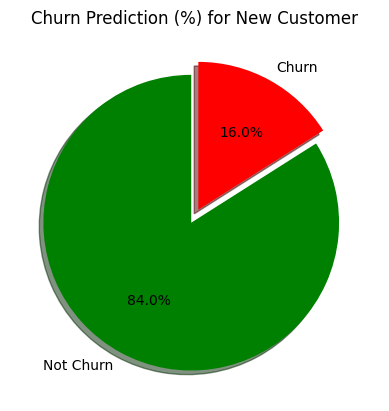

🟢 Customer is NOT likely to CHURN 
Probabilities (%): {'Not Churn': np.float64(57.0), 'Churn': np.float64(43.0)}


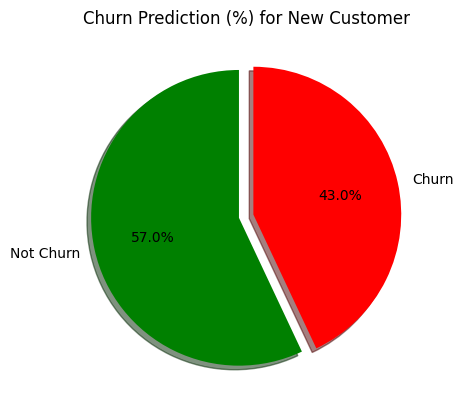

In [13]:
customer1 = {
    "subscription_type": "Premium",
    "payment_method": "Credit Card",
    "watch_hours": 60,
    "age": 15,
    "device": "Smart TV",
    "monthly_fee": 999,
    "gender": "Male",
    "favorite_genre": "Drama",
    "region": "Mumbai",
    "avg_watch_time_per_day": 3.5,
    "number_of_profiles": 4,
    "last_login_days": 2
}
customer2 = {
    "subscription_type": "Basic",
    "payment_method": None,          
    "watch_hours": 3,
    "age": None,                    
    "device": "Mobile",
    "monthly_fee": 199,
    "gender": "Female",
    "favorite_genre": None,         
    "region": "Delhi",
    "avg_watch_time_per_day": 0.2,
    "number_of_profiles": 1,
    "last_login_days": 45           
}
customer3 = {
    "subscription_type": "Standard",
    "payment_method": "UPI",
    "watch_hours": 15,
    "age": 22,
    "device": "Laptop",
    "monthly_fee": 499,
    "gender": "Female",
    "favorite_genre": "Comedy",
    "region": "Chennai",
    "avg_watch_time_per_day": 1.0,
    "number_of_profiles": 2,
    "last_login_days": 10
}
customer4 = {
    "age": 32,                        
    "gender": "Male",                 
    "region": "Delhi",                
    "subscription_type": "Preminum",  
    "monthly_fee": 500,               
    "watch_hours": 20,                
    "avg_watch_time_per_day": 1.5,    
    "favorite_genre": "Drama",        
    "device": "Mobile",              
    "last_login_days": 150,          
    "number_of_profiles": 2,         
    "payment_method": "UPI"      
}
customer5 = {
    "age": 60, 
    "gender": "Male",
    "region": "Gujrat",
    "subscription_type": "Standard",
    "monthly_fee": 1000,
    "watch_hours": 9,
    "avg_watch_time_per_day": 0.5,
    "favorite_genre": "Drama",
    "device": "TV",
    "last_login_days": 100,
    "number_of_profiles": 1,
    "payment_method": "DebitCard"
}
predict_customer_churn(customer1, model, expected_cols) 
predict_customer_churn(customer2, model, expected_cols)  
predict_customer_churn(customer3, model, expected_cols)
predict_customer_churn(customer4, model, expected_cols)
predict_customer_churn(customer5, model, expected_cols)